In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [147]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [148]:
%load_ext autoreload
%autoreload 

import csv
import numpy as np
from task import Task

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
task.

In [151]:
# Modify the values below to give the quadcopter a different starting position.
runtime = 5.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)

In [152]:
agent.act()

[461.95102896564873,
 461.37233690963063,
 460.60264481539497,
 458.93008018607065]

In [157]:

done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

len(to_write)

17

In [90]:
with open('data.txt','a') as file:
    writer = csv.writer(file)
    writer.writerow(['proba', '137', '2','3'])
  

In [91]:
pd.read_csv('data.txt')

,proba,134,2,3
0,proba,137,2,3


In [9]:
len([task.sim.time])+len (task.sim.pose) + len(task.sim.v) + len(task.sim.angular_v) + len(rotor_speeds) == len(labels)

True

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

NameError: name 'results' is not defined

The next code cell visualizes the velocity of the quadcopter.

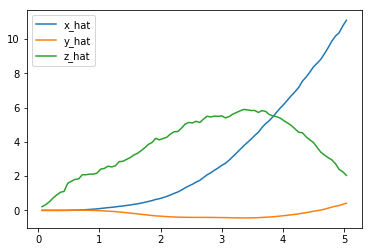

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

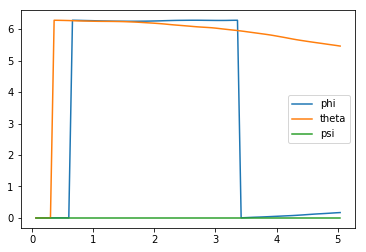

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

In [ ]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
#_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

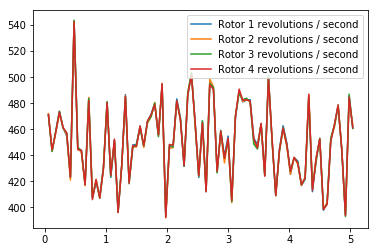

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[14.99659941 -0.98560638 29.11752062  0.16994563  5.46209415  0.        ]
[11.09652593  0.41629747  2.04475192]
[ 0.10688064 -0.27776893  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [ ]:
%load_ext autoreload

In [32]:

%autoreload
import numpy as np
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 5
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\r Episode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

 Episode =    5, score =  -0.536 (best =  -0.522), noise_scale = 0.25

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

This agent should perform very poorly on this task.  And that's where you come in!

## START HERE:
My steps:
1. Desing a class for training the agents.
2. Train test and plott. 
3. Conclude and answer the question.

In [196]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [228]:
%autoreload 

from task import Task
from agents import agent
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn
import pandas as pd
import numpy as np

In [230]:
%autoreload 
# Class trainer, Falta agregarle el ploter
import csv, sys

class Trainer:
    ''' Parameters: 
    -agent  is the ddpg algorithm, 
    -task  is the env
    -file_output: file to write
    -layer_actor: hidden layer of neural network model
    -layer_critic: hidden layer of neural network model
    -agent noise parameters: mu theta and sigma
    -agent parameters: gamma and tau
    -target_position: target to arrive the drone 
    -reward points: this points gives 100 of reawrd when touched'''

    def __init__(self, agent, task, task_time=1., file_output='data.txt', 
                       layer_actor=(32,64,64), layer_critic=(32,64,32,64),
                       agent_noise_mu_theta_sigma=(0, 0.15, 0.2), 
                       agent_gamma_tau=(0.01, 0.99),
                       init_pose=(0.,0.,0.,0.,0.,0.),  
                       target_position=([100.,100.,100.]), 
                       reward_points =([130,100,100],[70, 100,100],[100,130,100],
                                       [100,70, 100],[120,120,100],[80, 80, 100],
                                       [80,120, 100],[120,80, 100])):
        # Create output file name
        self.file_output = file_output
        # Create environment from task
        self.env = task(target_pos=target_position, runtime=task_time, init_pose=init_pose, reward_points=reward_points)                          
        # Create agent DDPG with layer and parameters specifications                
        self.agent = agent(self.env, layer_actor, layer_critic, 
                          agent_noise_mu_theta_sigma, agent_gamma_tau)
        # Define columns
        self.columns = ['episode','time','reward', 'x', 'y', 'z',
                        'phi', 'theta', 'psi', 
                        'x_velocity','y_velocity', 'z_velocity', 
                        'phi_velocity', 'theta_velocity', 'psi_velocity', 
                        'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
        
        # Rewards points and initial position:
        self.target_position = target_position
        self.reward_points   = reward_points 
        # Iniital position                 
        self.init_pose       = init_pose  
    def search_reward(self, num_episodes):
        # Create DataFrame for results with 17 columns
        self.results = pd.DataFrame(columns=self.columns)
        self.all_trajectories = pd.DataFrame(columns=['episode','time','x','y','z'])
        
        for i_episode in range(1, num_episodes+1):
            # First state, (3 for axis + 3 for angles)*repeatAction(3)=spaceState(18)
            state = self.agent.reset_episode()
            done = False
            # Temporal dataframe for step information
            self.data_step_frame = pd.DataFrame(columns=self.columns)
            while not done:
                # Agent choose action: pass 18, return 4 motor strength
                action = self.agent.act(state)
                # Act
                next_state, reward, done =  self.env.step(action)
                # Update state
                state = next_state
                # Save experience 
                self.save_experience(action, reward, next_state, done, i_episode)
        # Set the  episode number as the index
        self.results = self.results.set_index('episode')    
        # Set episdoe number as the index
        self.all_trajectories = self.all_trajectories.set_index(['episode'])
        
    def save_experience(self, action, reward, next_state, done, i_episode):
        # Inside the while loop do:
        # Save step experience in the agent
        self.agent.step(action, reward, next_state, done)
        # Obtain environment information from simulator and save it in a Serie,episode(1), time(1), reward(1), pose(6), V(3),angular(3), rotor_speed(4)
        data_step_serie = pd.Series([i_episode] + [self.env.sim.time] + [reward] + list(self.env.sim.pose) + 
                                    list(self.env.sim.v) + list(self.env.sim.angular_v) + list(action), 
                                    index=self.columns)
        # Append environment information to temporal dataframe( Serial to Dataframe)
        self.data_step_frame = self.data_step_frame.append(data_step_serie, ignore_index=True)
        if done:
                # Save trajectorie for later plotting 
                self.all_trajectories = pd.concat([self.all_trajectories, self.data_step_frame[['episode','time','x','y','z']]])
                # Create Data episode with the mean valor of each data_step_frame column plus the  total reward and the episode number.
                data_episode = pd.DataFrame(pd.Series([i_episode, self.data_step_frame['reward'].sum()] + 
                                          [self.data_step_frame[i].mean() for i in self.columns[2:]], 
                                           index=self.columns), index=self.columns).T # Serie index and Dataframe index 
                # Concat dataFrame episode to results DataFrame
                self.results = pd.concat([self.results, data_episode])
                print('\r Episode= {:1d}, Reward={:7.3f}'.format(i_episode, self.data_step_frame['reward'].sum()), end='')
                sys.stdout.flush()
    
    def save_to_file(self):          
                # Save to file
        self.results.to_csv(self.file_output)
        
    def plot_results(self):
        fig ,ax = plt.subplots(2,2, figsize=(17,13), facecolor='gray')
        
        ax[0,0].set(title='Reward')
        ax[0,0].plot(self.results.index, self.results['reward'], label=' Reward', color='g')
        ax[0,0].grid(True)
        ax[0,0].legend(loc='best')
        
        ax[0,1].set(title='Coordenates ubication')
        ax[0,1].plot(self.results.index, self.results['x'], color='r', label= 'X')
        ax[0,1].plot(self.results.index, self.results['y'], color='b', label= 'Y')
        ax[0,1].plot(self.results.index, self.results['z'], color='c', label= 'Z')
        ax[0,1].grid(True)
        ax[0,1].legend(loc='best')
        
        ax[1,0].set(title='Angles movement')
        ax[1,0].plot(self.results.index, self.results['phi'], color='r', label= 'X')
        ax[1,0].plot(self.results.index, self.results['theta'], color='b', label= 'Y')
        ax[1,0].plot(self.results.index, self.results['psi'], color='c', label= 'Z')
        ax[1,0].grid(True)
        ax[1,0].legend(loc='best')
        
        ax[1,1].set(title='Motor power')
        ax[1,1].plot(self.results.index, self.results['rotor_speed1'], color='r', label='M1')
        ax[1,1].plot(self.results.index, self.results['rotor_speed2'], color='b', label='M2')
        ax[1,1].plot(self.results.index, self.results['rotor_speed3'], color='c', label='M3')
        ax[1,1].plot(self.results.index, self.results['rotor_speed4'], color='m', label='M4')
        ax[1,1].grid(True)
        ax[1,1].legend(loc='best')
        
    def plot_trajectory(self, episode=None):
        # Get the episode with more reward
        
        best_episode = pd.Series.idxmax(self.results['reward'])
        
        episode = episode if episode is not None else best_episode 
        
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection='3d')
        # Plot initial position and reward points
        reward_points_transpose = np.array(self.reward_points).T                 
        ax.scatter(reward_points_transpose[0], reward_points_transpose[1], reward_points_transpose[2])
        ax.scatter(self.init_pose[0], self.init_pose[1], self.init_pose[2] )                 
        # Plot drone trajectorie in the episode with better reward
        ax.plot(self.all_trajectories['x'][episode], self.all_trajectories['y'][episode], self.all_trajectories['z'][episode])
            
     

In [177]:
# High theta low sigma mu 450, task2
trainer_number_one = Trainer(agent.DDPG, Task, task_time=10., 
                            agent_noise_mu_theta_sigma=(450,0.9,0.1),
                            agent_gamma_tau=(0.95,0.9))

In [178]:
trainer_number_one.search_reward(1000)

 Episode= 1000, Reward=410.401

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

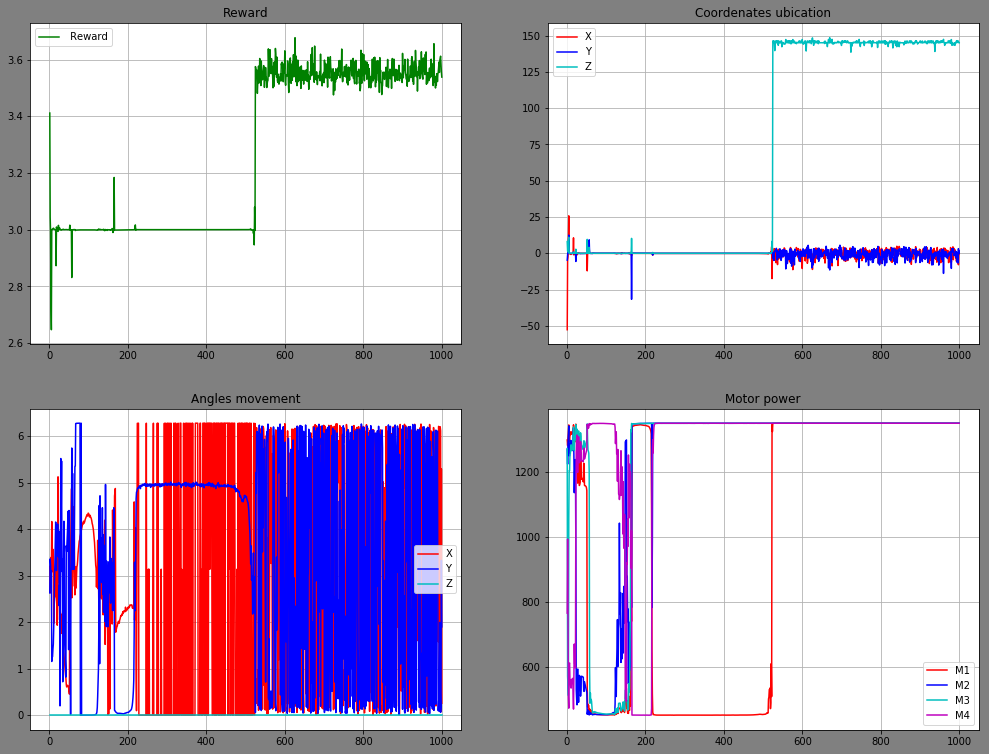

In [185]:
trainer_number_one.plot_results()
# itS have a moment, he maybe found a point

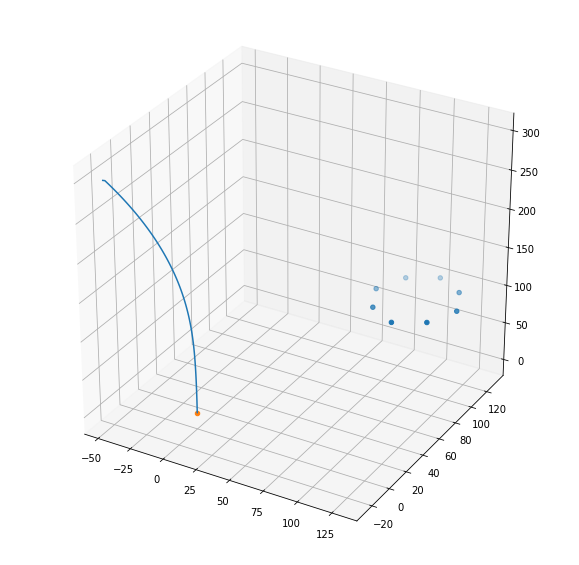

In [186]:
trainer_number_one.plot_trajectory()

In [179]:
# Low theta high sigma mu 450, task2
trainer_number_two = Trainer(agent.DDPG, Task, task_time=7., 
                            agent_noise_mu_theta_sigma=(450,0.9,0.05),
                            agent_gamma_tau=(0.95,0.9))
# High theta high sigma mu 450, task2
trainer_number_three = Trainer(agent.DDPG, Task, task_time=7., 
                            agent_noise_mu_theta_sigma=(450,0.9,0.9),
                            agent_gamma_tau=(0.95,0.9))
# Low theta low sigma mu 450, task2
trainer_number_four = Trainer(agent.DDPG, Task, task_time=7., 
                            agent_noise_mu_theta_sigma=(450,0.1,0.1),
                            agent_gamma_tau=(0.95,0.9))

bag_of_trainers = [trainer_number_two, trainer_number_three, trainer_number_four]

In [180]:
# train somes agents
for trainer in bag_of_trainers:
    trainer.search_reward(num_episodes=1000)

 Episode= 1000, Reward=  3.000

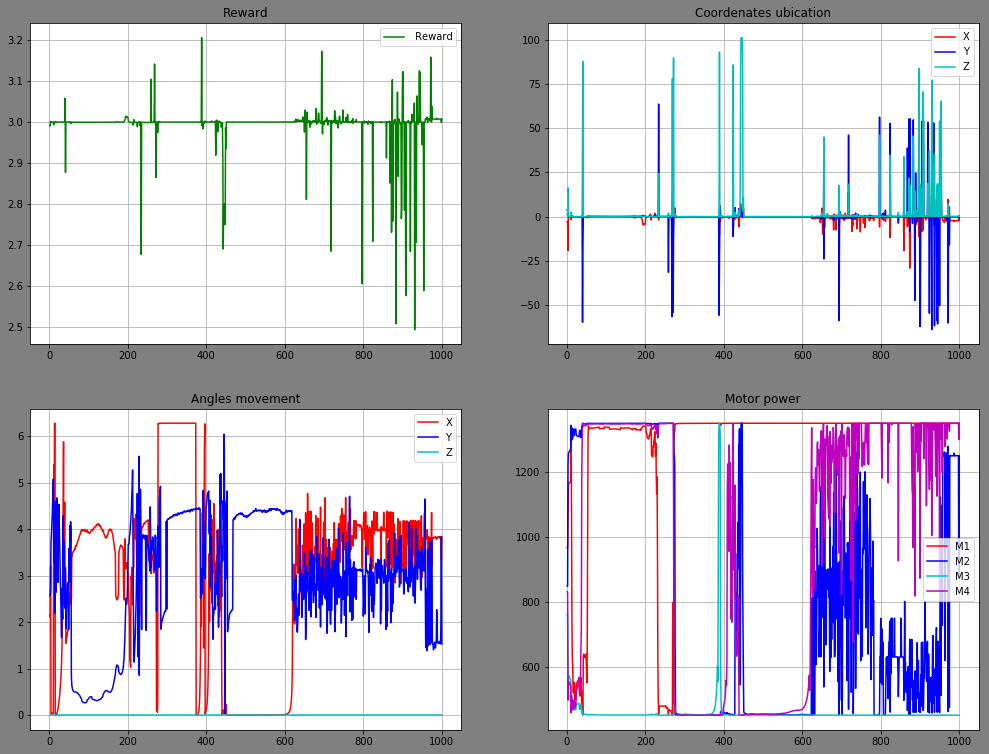

In [181]:
trainer_number_two.plot_results()


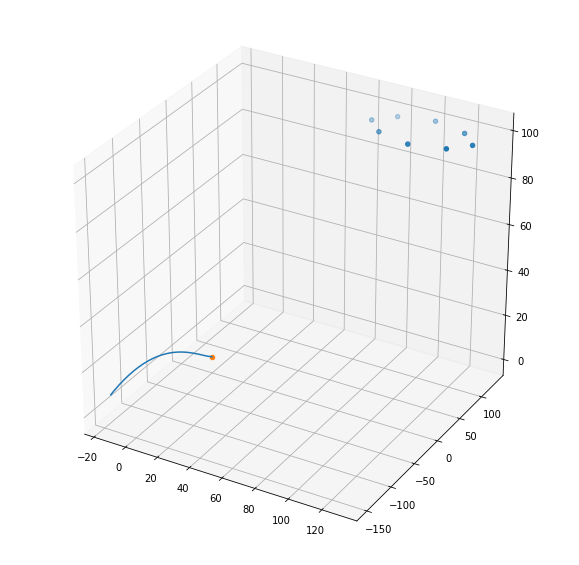

In [182]:
trainer_number_two.plot_trajectory()

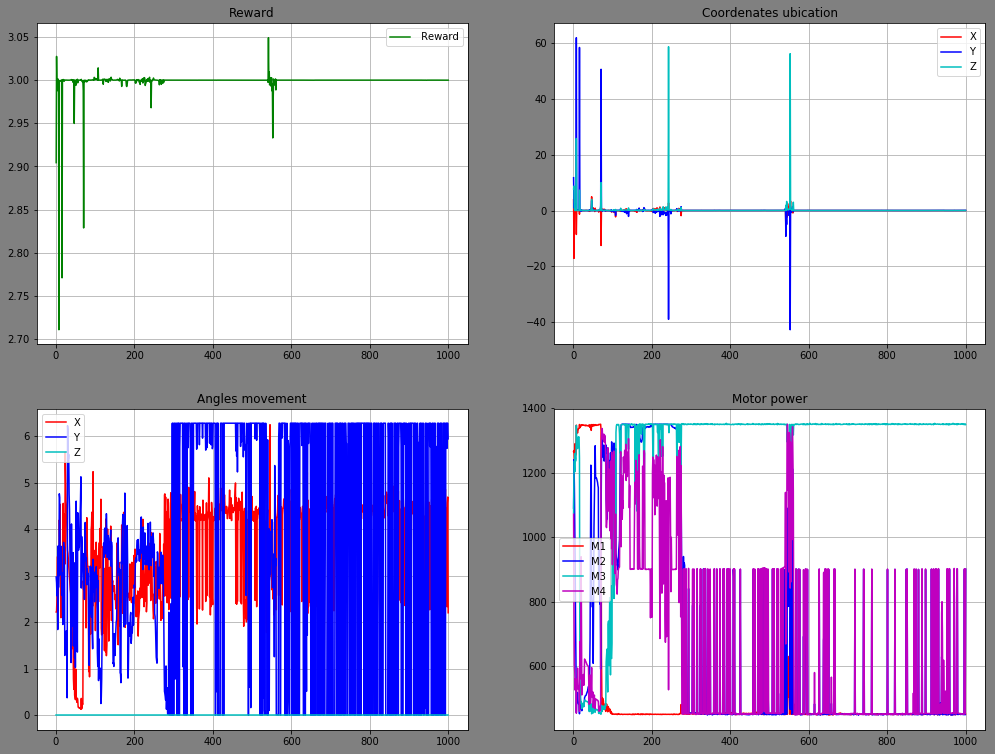

In [183]:
trainer_number_three.plot_results()

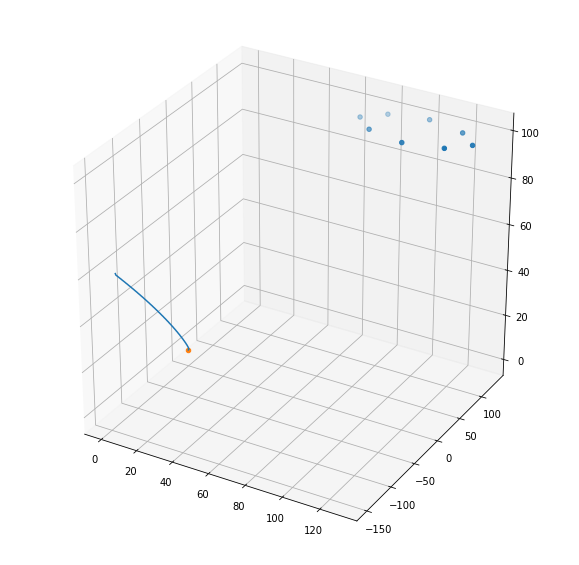

In [184]:
trainer_number_four.plot_trajectory()
# I think that the points are very far

In [200]:
# with the points closer at 20 of z, task1, mu 350
trainer_number_five = Trainer(agent.DDPG, Task, task_time=10., 
                            agent_noise_mu_theta_sigma=(350,0.87,0.07),
                            agent_gamma_tau=(0.95,0.95),reward_points=([130,100,20],[70, 100,20],[100,130,20],
                                                                      [100,70, 20],[120,120,20],[80, 80, 20],
                                                                      [80,120, 20],[120,80, 20]))

trainer_number_six = Trainer(agent.DDPG, Task, task_time= 7., 
                            agent_noise_mu_theta_sigma=(350,0.092, 0.12),
                            agent_gamma_tau=(0.95,0.93), reward_points=([130,100,20],[70, 100,20],[100,130,20],
                                                                        [100,70, 20],[120,120,20],[80, 80, 20],
                                                                        [80,120, 20],[120,80, 20]))
 
trainer_number_seven = Trainer(agent.DDPG, Task, task_time=10., 
                            agent_noise_mu_theta_sigma=(330,0.95,0.09),
                            agent_gamma_tau=(0.95,0.87),reward_points=([130,100,20],[70, 100,20],[100,130,20],
                                                                        [100,70, 20],[120,120,20],[80, 80, 20],
                                                                        [80,120, 20],[120,80, 20]))

trainer_number_eight = Trainer(agent.DDPG, Task, task_time=10., 
                            agent_noise_mu_theta_sigma=(450, 0.9,0.09),
                            agent_gamma_tau=(0.95, 0.93),reward_points=([130,100,20],[70, 100,20],[100,130,20],
                                                                        [100,70, 20],[120,120,20],[80, 80, 20],
                                                                        [80,120, 20],[120,80, 20]))

In [203]:
bag_of_trainer_two = [trainer_number_five, trainer_number_six, trainer_number_seven, trainer_number_eight] 

In [206]:
for trainer in bag_of_trainer_two:
    trainer.search_reward(1000)

 Episode= 1000, Reward= 75.2383

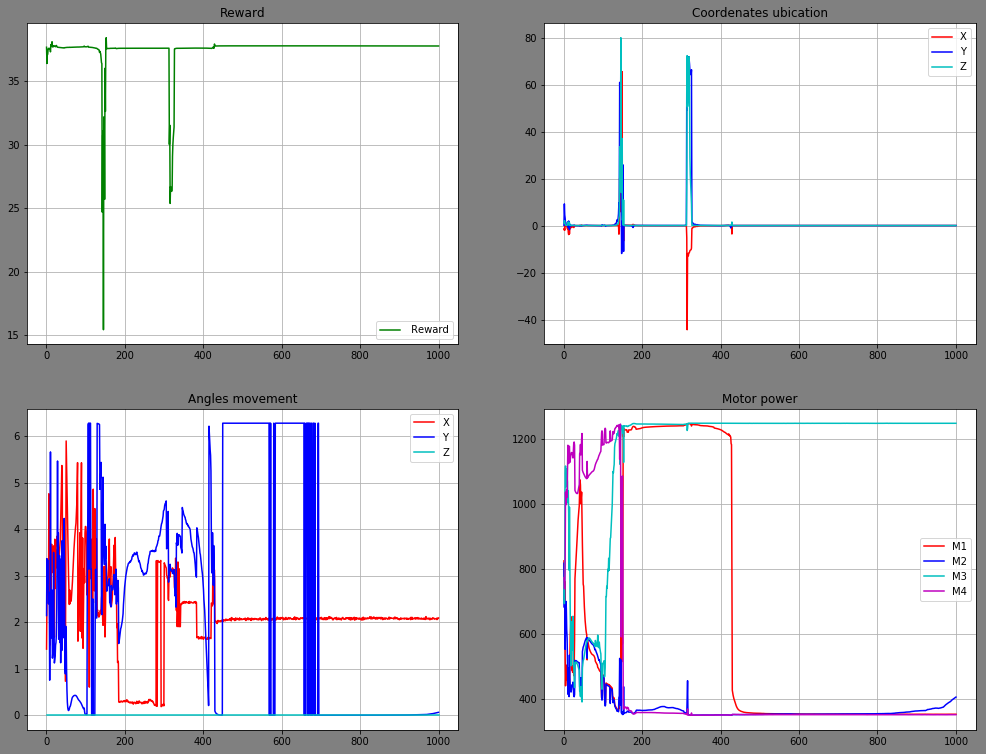

In [207]:
trainer_number_five.plot_results()

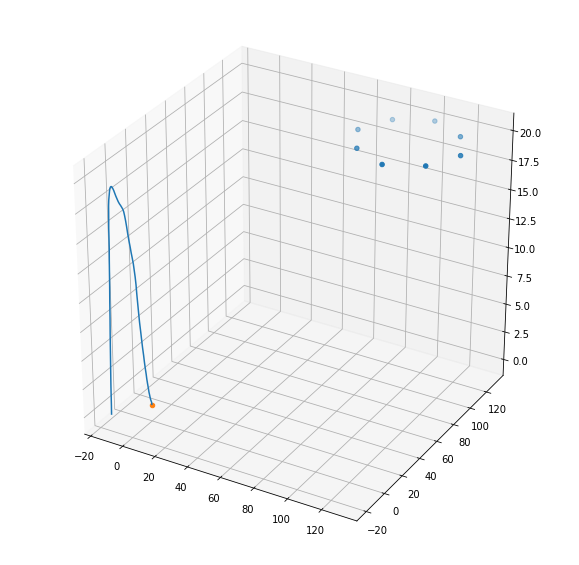

In [208]:
trainer_number_five.plot_trajectory()

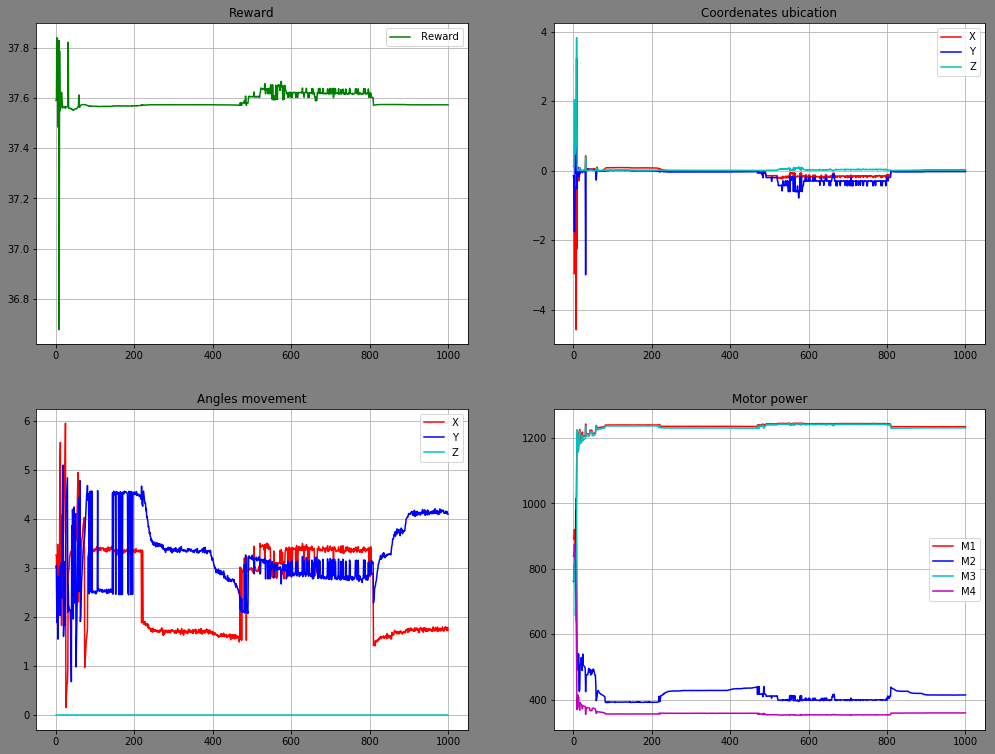

In [209]:
trainer_number_six.plot_results()

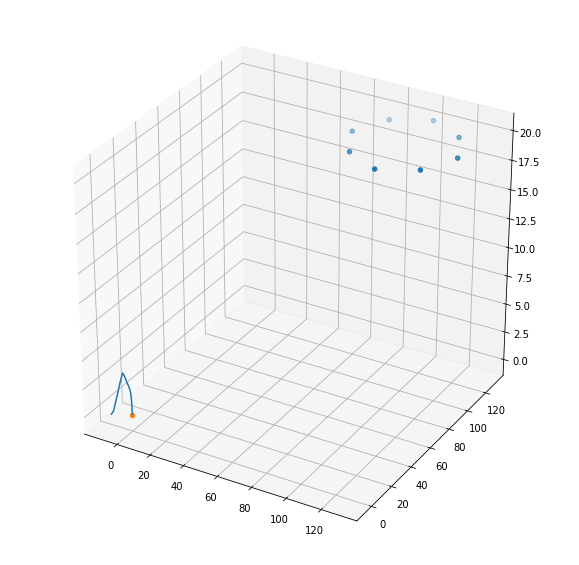

In [210]:
trainer_number_six.plot_trajectory()

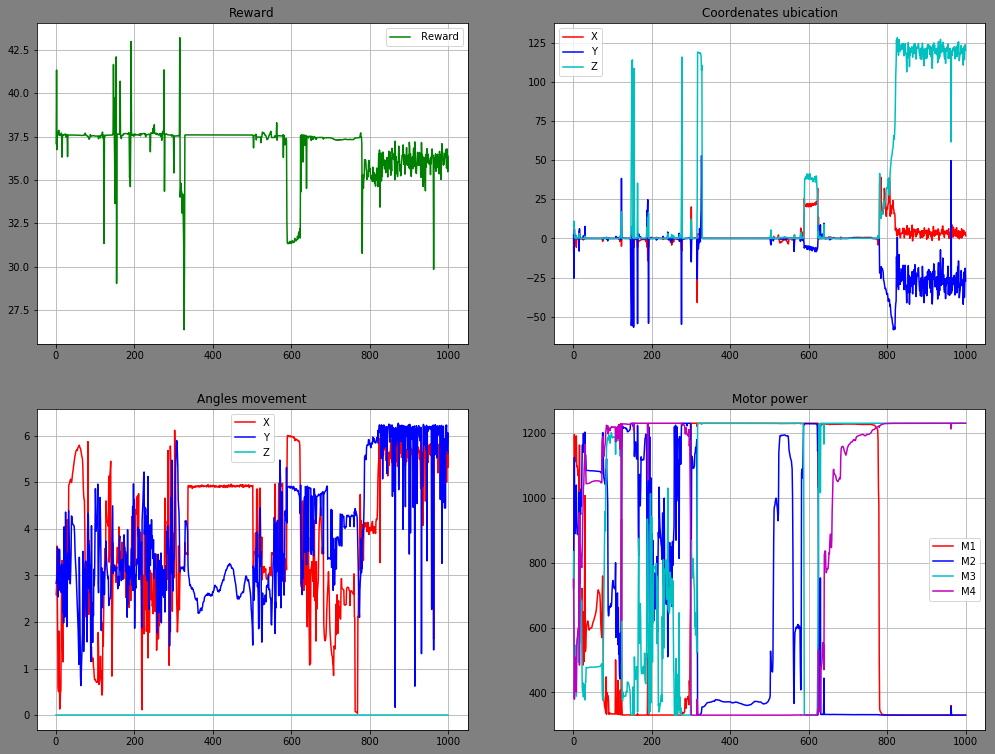

In [211]:
trainer_number_seven.plot_results()

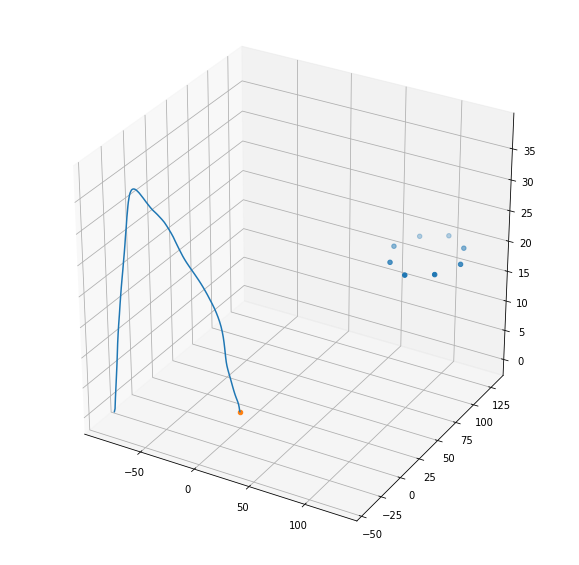

In [212]:
trainer_number_seven.plot_trajectory()

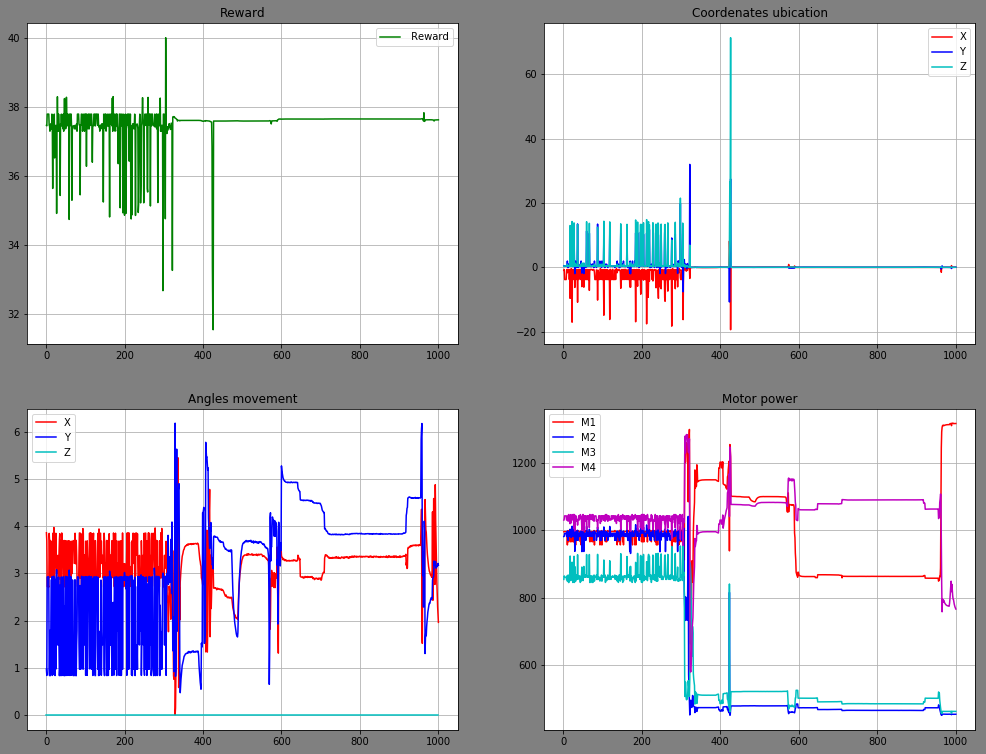

In [213]:
trainer_number_eight.plot_results()

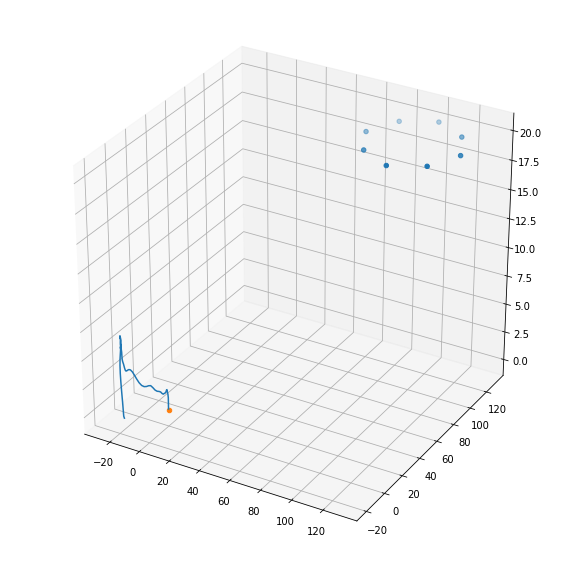

In [214]:
trainer_number_eight.plot_trajectory()

In [231]:
# Task number 2
trainer_number_nine = Trainer(agent.DDPG, Task, task_time=10., 
                            agent_noise_mu_theta_sigma=(450, 0.9,0.09),
                            agent_gamma_tau=(0.95, 0.93),target_position=[40.,40.,5.],
                            reward_points=([50.,40.,5.],[30., 40.,5.],[40.,50.,5.],
                                           [40.,30., 5.],[45.,45.,5.],[35., 35., 5],
                                           [35.,45., 5],[45.,35., 5.]))

In [232]:
trainer_number_nine.search_reward(1000)

 Episode= 1000, Reward= 74.5903

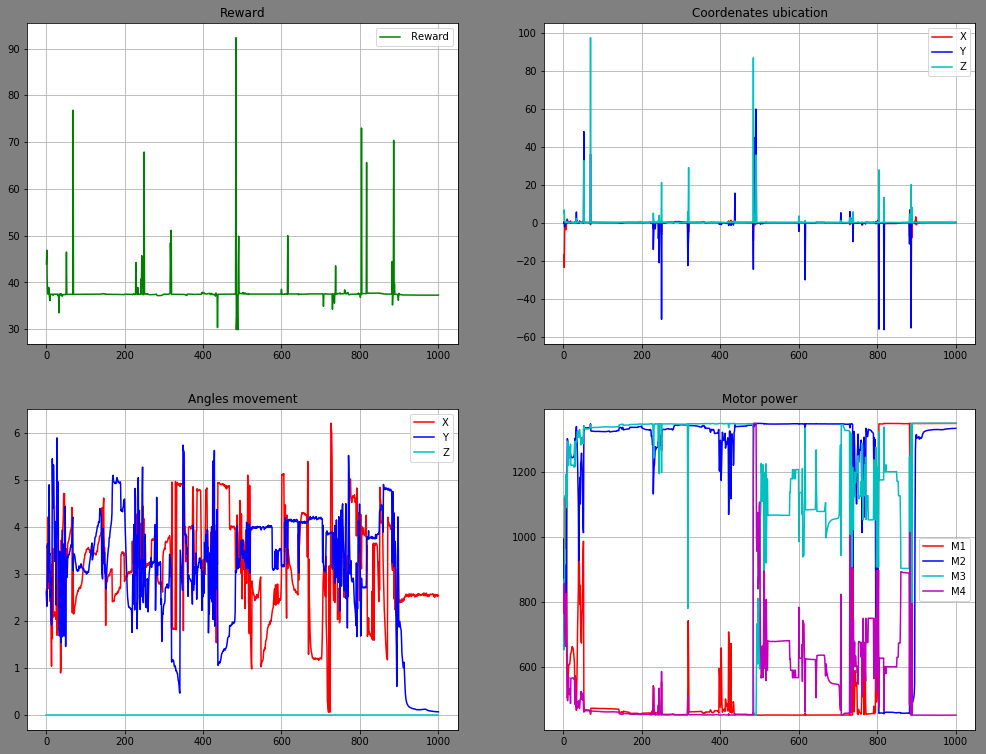

In [233]:
trainer_number_nine.plot_results()

In [245]:
trainer_number_nine.results['reward'][trainer_number_nine.results.index>990].mean()

37.295240253918514

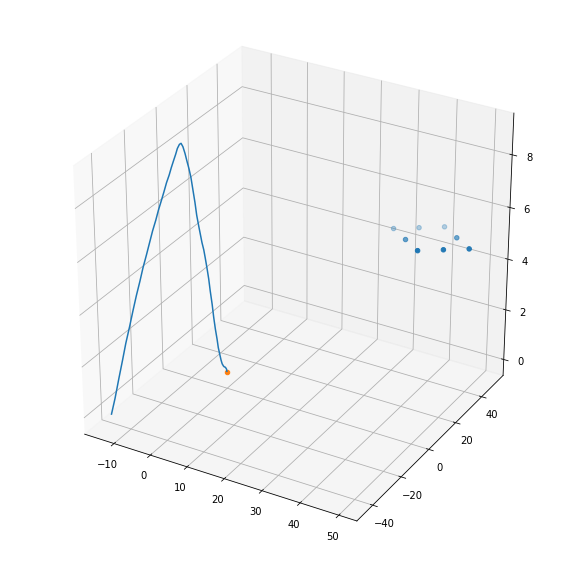

In [242]:

trainer_number_nine.plot_trajectory(882)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**:

### Task:
The task I designed is composed of four parts: 

1. One of them is a formula that pays a reward if the drone is closer to a target location in the 3d space, when the distance is minor pay more.

2. The second is a payment for saving motor power, the less is the use of the motor the more I pay to the drone. 

3. The third part of the task is composed for eights points in the 3d space that pay a big quantity of reward if the drone touch it one time, after that the point is marked as touched and don't pay again until the episode is reset. This was my main objective in the reward function I want to motivate the drone to make a trail in the points I marked. 

4. The fourth is a punishment for not being in the targets points.

For my experiments I use Task1 with all conditions included, and task2 only with the first and the third condition. When I create each Trainer object I specify the task that will use in comments.

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer:

### The algorithm I use:
     
In this work I use the "Deep Deterministic Policy Gradient" algorithm shortened DDPG, it is a model-free meaning that the agent will try to directly learn the best policy without constructing a model of the "world". Also is an "off-policy" algorithm meaning that we have a policy for behavior and other policy for evaluation, this is in the actor-critic architecture, whereas the actor interacts with the environment and the critic evaluate with state-value function the policy parameters. "Policy gradient methods" learn a parameterized policy that can select action without consulting a value function. Methods like ours that learn approximation to both policy and value functions are called actor-critic methods. "Deterministic Policy" means that the probability of one action A is taken at time T given that the environment is in state S is zero or one. This make no room for exploration, and for that the algorithm introduce the "Ornstein-Uhlenbeck" process for generating the necessary noise for exploration. "Deep" is related to the neural network, I understand that having two hidden layers we can say that the architecture is deep. Also the algorithm incorporate recent success of the Deep Q Network for make our algorithm more stable.The first one is that the network is trained with samples from a replay buffer to minimize correlation. And the second is that the network is trained with a target network to give consistent target during temporal difference backups. At some point it would be a good idea to include prioritized samples to the replay buffer.
### Network Architecture:
The network architecture that I use for the actor is composed from three hidden layers fully connected with a size of 32 the first, 64 the second and 64 the third. All three with "tanh" activation function, I use this because I found interesting mapping from -1 to 1, but I am really experimenting. For the output layer I use a sigmoid activation function. And for the optimizer I use the Adam optimizer that have some improves with respect to to the traditional stochastic gradient descent.
For the critic I use four hidden layers, two for states and two for actions, with 32 and 64 neurons each one, also fully conected. I use an activation function "tanh". Then we have other layer for join together actions and states path with sigmoid activation function, and I also use the Adam optimizer for the critic.

### Final Parameters:
* For the algorithm:
* Gamma discount rate: 0.95
* Soft update, Tau: 0.93
* For the Ornstein-Uhlenbeck:
* mu : 450
* theta : 0.9
* sigma : 0.09




**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

## Learning over time:
**Answer**: 
My drone didn't learn very well, I must continue experimenting and tweaking the reward function, my main goal was that the drone make a trail in the rewards points. Maybe the task was too difficult.  At the beginning the points was very far. Then I moved closer to the drone but also didn't make the trail. The trainer number one have an "aha moment" near the 500 episode. In general all the agent kept constant the reward and perform spikes for some moments. The Agent number nine performed with a mean reward of 37 in the last ten episodes. I modified the hyperparameters over differents agents, and also experiment with the task1 and task2.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:

## My experience in the project:
### The hardest part: 
I think that the hardest part of this project was the beginning, its a project that covers so many topics that doing it fast or hurried would prevent me from learning, I would have liked to have more time but it's always like that. At the beginning I was doing the things slowly because I try to get familiar with all the parts of the project. In the beginning I spend the time creating the Trainer class, I wanted to have a tool to pass my parameters and record the training with the capability of plot the results. 
After that I start working in the task, and take a while to realize how important it is. And start to think in how resolv the reward function and what I want to motivate in the behavior of the drone. The task part was challenging it really force me to think in the drone and in the problems that it could face. At the end using the common sense I could give the problem a shape in my head.
The algorithm parts is also hard but with time I could understand the dynamics, in this topic the hardest part for me was going from pseudocode to code and from math to code. I think it's a skill that I have to polish.
### Ideas for improving the project:
1. Make the reward function more clear, and scale it to 0,1 in the total reward.
2. Change the optimizer to stochastic gradient descent for analizing the results.
3. Include prioretized samples on the reaplay buffer.

### Interesting behavior in the agent
In many of the experiments, the agent stop trying and stay static, maybe because in the beginning I put a reward if he don't use so much motor power with this condition I try to motivate slow movements and not sudden movements, but I feel that this confuse the drone and it gave up on trying new things. That make me look the exploration policy, the noise introduced to the algorithm. Also when I introduce punishment for wrong position in the reward function the  behavior was rare, moving a lot the angles and then staying static. At the end I remove the reward for not using the motors and the punishment for wrong locations from the reward function.
